
# GloVe (Global Vectors for Word Representation) Embedding Creation

GloVe embeddings are created through the following process:

1. Construct a word-word co-occurrence matrix from a large corpus of text.
2. Define a weighted least squares regression model that learns word vectors.
3. Use the co-occurrence statistics to train the model, minimizing the difference between the dot product of word vectors and the logarithm of their co-occurrence probability.
4. The resulting word vectors capture semantic relationships between words.

Key features of GloVe:
- Combines global matrix factorization and local context window methods
- Efficiently leverages statistical information about the corpus
- Performs well on word analogy, similarity, and named entity recognition tasks

GloVe embeddings are pre-trained on various corpora and can be fine-tuned or used as-is for downstream NLP tasks.



# Different Sizes of GloVe Embeddings

GloVe embeddings are available in various dimensions, typically:

1. 50-dimensional (50d)
2. 100-dimensional (100d)
3. 200-dimensional (200d)
4. 300-dimensional (300d)

These different sizes offer a trade-off between model complexity and performance:

- Smaller dimensions (50d, 100d):
  - Faster training and inference
  - Lower memory requirements
  - Suitable for simpler tasks or resource-constrained environments

- Larger dimensions (200d, 300d):
  - Capture more nuanced semantic relationships
  - Generally perform better on complex NLP tasks
  - Require more computational resources

The choice of embedding size depends on the specific task, available computational resources, and the desired balance between model performance and efficiency.


# What is the intuition behind it?

GloVe is essentially a log-bilinear model with a weighted least-squares objective. The main intuition underlying the model is the simple observation that ratios of word-word co-occurrence probabilities have the potential for encoding some form of meaning.

Consider the entity

P_ik/P_jk where P_ik = X_ik/X_i

 F(i,j,k) = P_ik/P_jk

Here P_ik denotes the probability of seeing word i and k together, which is computed by dividing the number of times i and k appeared together (X_ik) by the total number of times word i appeared in the corpus (X_i).


# How is it created?

Step1:
 
Get unigram count for all words in the corpus.

Step 2:

Calculate word to word co occurrence matrix.

    


#### What is co occurrence matrix?

It works with or without context window. The count is increased if a word is present within context window. The co-occurrence matrix tells you how often a particular word pair occurs together. Each value in the co-occurrence matrix represents a pair of words occurring together

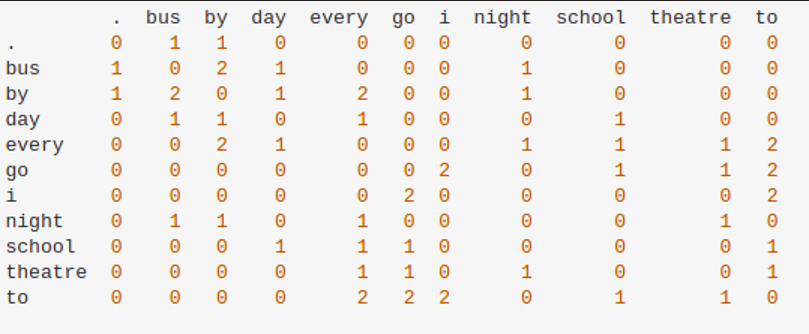



In [6]:
import numpy as np
from collections import defaultdict

def create_co_occurrence_matrix(sentences, context_window):
    # Create vocabulary
    vocab = set(word for sentence in sentences for word in sentence.split())
    word_to_id = {word: i for i, word in enumerate(vocab)}
    
    # Initialize co-occurrence matrix
    co_occurrence_matrix = np.zeros((len(vocab), len(vocab)), dtype=np.int32)
    
    for sentence in sentences:
        words = sentence.split()
        for i, center_word in enumerate(words):
            for j in range(max(0, i - context_window), min(len(words), i + context_window + 1)):
                if i != j:
                    co_occurrence_matrix[word_to_id[center_word]][word_to_id[words[j]]] += 1
    
    return co_occurrence_matrix, word_to_id

# Example usage
sentences = [
    "the quick brown fox jumps over the lazy dog",
    "the lazy dog sleeps all day",
    "the quick brown fox is cunning"
]

context_window = 2
co_occurrence_matrix, word_to_id = create_co_occurrence_matrix(sentences, context_window)

print("Co-occurrence Matrix:")
print(co_occurrence_matrix)

print("\nWord to ID mapping:")
for word, idx in word_to_id.items():
    print(f"{word}: {idx}")



Co-occurrence Matrix:
[[0 0 0 2 0 0 0 0 1 0 2 1 0]
 [0 0 0 0 1 1 0 2 0 0 2 0 2]
 [0 0 0 1 0 1 0 0 0 0 1 0 1]
 [2 0 1 0 0 0 0 0 0 0 2 1 0]
 [0 1 0 0 0 0 0 0 0 1 0 0 1]
 [0 1 1 0 0 0 0 0 0 0 1 0 1]
 [0 0 0 0 0 0 0 0 1 0 0 1 0]
 [0 2 0 0 0 0 0 0 0 0 2 0 2]
 [1 0 0 0 0 0 1 0 0 0 0 1 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 1]
 [2 2 1 2 0 1 0 2 0 0 0 0 0]
 [1 0 0 1 0 0 1 0 1 0 0 0 0]
 [0 2 1 0 1 1 0 2 0 1 0 0 0]]

Word to ID mapping:
dog: 0
brown: 1
over: 2
lazy: 3
is: 4
jumps: 5
day: 6
quick: 7
all: 8
cunning: 9
the: 10
sleeps: 11
fox: 12


Step 3:

Train GloVe algorithm i.e log-bilinear model with co-occurrence matrix.

A neural network is trained on the below equation. 
w_i* u_k + bw_i +bu_k= log(X_ik)
or,
w_i* u_k + bw_i +bu_k — log(X_ik) = 0
where bw and bu are biases of the network.

https://towardsdatascience.com/light-on-math-ml-intuitive-guide-to-understanding-glove-embeddings-b13b4f19c010

More on http://text2vec.org/glove.html





# Advantages and Disadvantages of GloVe Embeddings

# Advantages:
 1. Efficient use of statistics: GloVe leverages global word-word co-occurrence statistics from the corpus.
 2. Captures both local and global context: Combines the benefits of local context window methods and global matrix factorization.
 3. Performs well on word analogy tasks: Often outperforms other methods in semantic and syntactic accuracy.
 4. Relatively fast training: Can be trained on large corpora in a reasonable amount of time.
 5. Interpretable model components: The resulting word vectors have meaningful substructure.

# Disadvantages:
 1. Static embeddings: Cannot capture polysemy (multiple meanings of a word) as each word has a single vector.
 2. Requires large corpus: Needs a significant amount of text data to generate high-quality embeddings.
 3. Fixed vocabulary: Cannot handle out-of-vocabulary words without retraining.
 4. Lack of context-awareness: Unlike more recent models (e.g., BERT), GloVe doesn't consider the context in which a word appears.
 5. Memory intensive: Storing the co-occurrence matrix for large vocabularies can be memory-intensive.


# research paper

[text](../../../../../../AppData/Local/Temp/OneNote/16.0/Exported/{AD2DD2C8-38DE-4C9B-BB16-1B5808362186}/NT/0/glove.pdf)